In [1]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
# moving average smoothing
from obspy.signal.util import smooth
# Konno & Ohmachi logarithmic smoothing
from obspy.signal.konnoohmachismoothing import konno_ohmachi_smoothing

In [2]:
tr = obspy.read('*BHZ*')[0]
tr.detrend('linear').taper(0.05)
data = tr.data.copy()
npts = tr.stats.npts
dt = tr.stats.delta

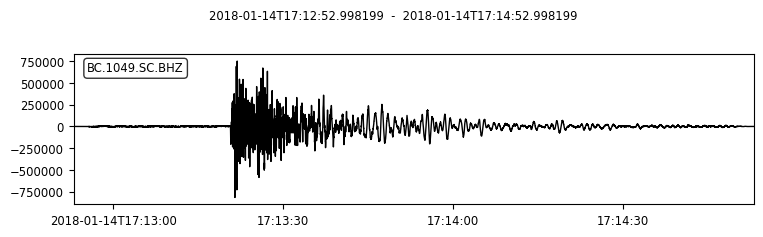

In [3]:
tr.plot();

In [4]:
# perform fast fourier transform
fftdata = np.abs(np.fft.rfft(data, npts))
fftfreq = np.fft.rfftfreq(npts, dt)

In [5]:
# moving average smooth
avesmt = smooth(fftdata, 8)
# logarithmic smooth, (must set normalize to be True!)
logsmt = konno_ohmachi_smoothing(fftdata, fftfreq, bandwidth=40, normalize=True)

(0.1, 200)

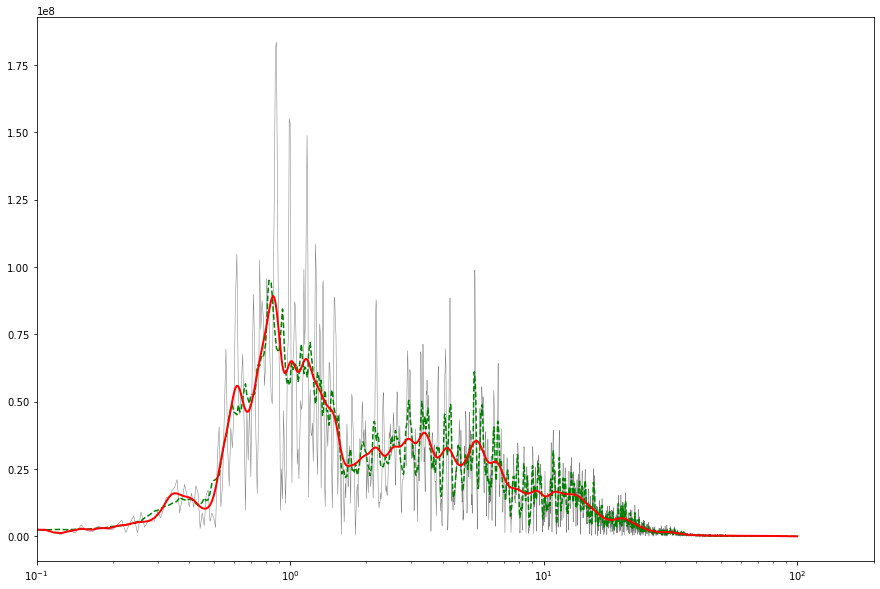

In [6]:
# comparison
plt.figure(figsize=(15, 10), facecolor='white')
# raw - thin gray line
plt.semilogx(fftfreq, fftdata, 'gray', lw=0.5)
# moving average - dashed green line
plt.semilogx(fftfreq, avesmt, 'green', ls='dashed')
# logarithm - thick red line
plt.semilogx(fftfreq, logsmt, 'red', lw=2)
plt.xlim(0.1, 200)

(0.0, 10.0)

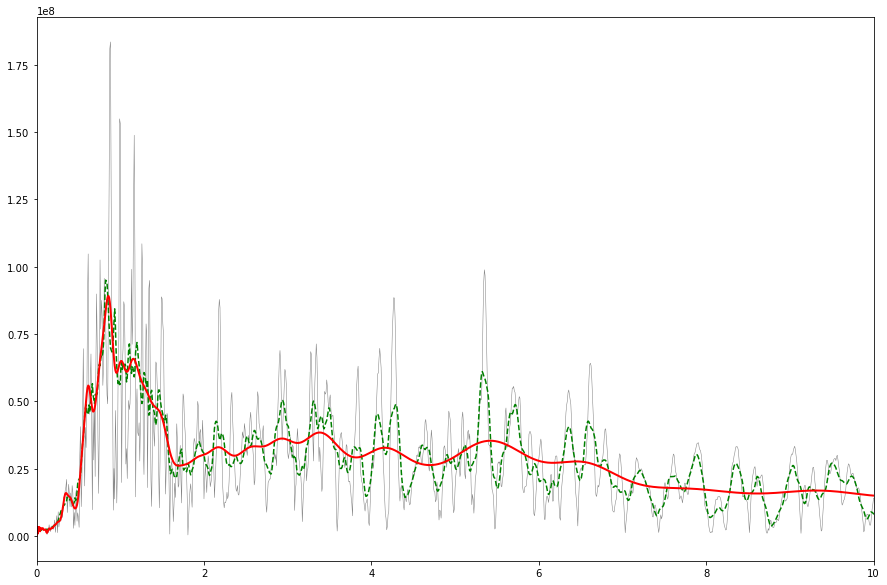

In [7]:
# comparison
plt.figure(figsize=(15, 10), facecolor='white')
# raw - thin gray line
plt.plot(fftfreq, fftdata, 'gray', lw=0.5)
# moving average - dashed green line
plt.plot(fftfreq, avesmt, 'green', ls='dashed')
# logarithm - thick red line
plt.plot(fftfreq, logsmt, 'red', lw=2)
plt.xlim(0, 10)

# Konno & Ohmachi Smoothing

In [9]:
from obspy.signal.konnoohmachismoothing import konno_ohmachi_smoothing_window

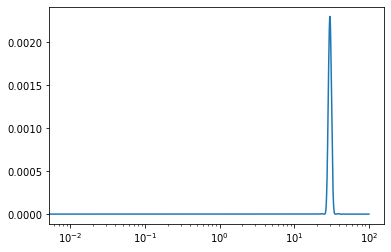

In [10]:
smtwin = konno_ohmachi_smoothing_window(fftfreq, 30, bandwidth=40.0, normalize=True)
plt.semilogx(fftfreq, smtwin)

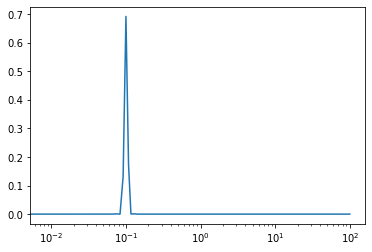

In [11]:
smtwin = konno_ohmachi_smoothing_window(fftfreq, 0.1, bandwidth=40.0, normalize=True)
plt.semilogx(fftfreq, smtwin)